In [5]:
import yfinance as yf
yf.pdr_override()

import numpy as np
import pandas as pd

tickers=pd.read_csv("tickers.csv")
tickers=tickers["Symbol"].values.tolist()

In [3]:
def get_history(ticker):
    ticker_obj=yf.Ticker(ticker)
    df_ticker = ticker_obj.history(period="max")
    return df_ticker
data={}
Counter=1
'''
for ticker in tickers:
    print(Counter,ticker)
    try:
        data[ticker]=get_history(ticker)
    except:
        pass
    Counter=Counter+1
'''

'\nfor ticker in tickers:\n    print(Counter,ticker)\n    try:\n        data[ticker]=get_history(ticker)\n    except:\n        pass\n    Counter=Counter+1\n'

<AxesSubplot:xlabel='Date'>

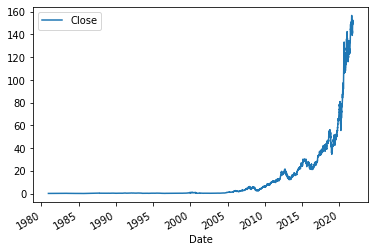

In [19]:
#SOR, WINVR
data["AAPL"][["Close"]].plot()

In [13]:
import pickle

filehandler = open("Stock_Data.obj","wb")
pickle.dump(data,filehandler)
filehandler.close()

In [34]:
from gurobipy import *
import random
import numpy as np

SP500_Return=0.05
Stock_Size=500
Desired_Stocks=10
Stock_Returns=[random.gauss(0.05, 0.05) for i in range(Stock_Size)]
Stock_Indicators={}

m=Model()

for i in range(Stock_Size):
    Stock_Indicators[i]=m.addVar(vtype=GRB.BINARY, name="x")

Total_Return=m.addVar(vtype=GRB.CONTINUOUS, name="x")
Total_Return2=m.addVar(vtype=GRB.CONTINUOUS, name="x")

m.addConstr(quicksum(Stock_Indicators[i] for i in range(Stock_Size))>=Desired_Stocks)
m.addConstr(Total_Return==quicksum(Stock_Indicators[i]*Stock_Returns[i] for i in range(Stock_Size))-SP500_Return*quicksum(Stock_Indicators[i] for i in range(Stock_Size)))
m.addConstr(Total_Return2 == abs_(Total_Return))
m.setObjective(Total_Return2)
m.optimize()

Return=0

Num_Stocks=sum([Stock_Indicators[i].X for i in range(Stock_Size)])

print(Num_Stocks)

for i in range(Stock_Size):
    if Stock_Indicators[i].X>0.9:
        val=1
    else:
        val=0
    
    Return=Return+val*Stock_Returns[i]

print(Return/Num_Stocks,SP500_Return)

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 502 columns and 501 nonzeros
Model fingerprint: 0xf01e5984
Model has 1 general constraint
Variable types: 2 continuous, 500 integer (500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
500.0
0.05000000000000044 0.05


In [20]:
import platform
print(platform.python_version())

3.8.7


In [23]:
ls

gurobi.log               ticker_data.ipynb        timeseries_finalproject/
optimization.py          tickers.csv


In [1]:
import pandas as pd

df_read = pd.read_pickle(r'Stock_Data.obj')

In [6]:
df_list=[]
tickers=df_read.keys()
for ticker in tickers:
    if len(df_read[ticker])>0:
        df_read[ticker]["Date_NI"]=df_read[ticker].index
        df_read[ticker]["Ticker"]=ticker
        df_list.append(df_read[ticker])

df_SPX=get_history("^GSPC")
df_SPX["Date_NI"]=df_SPX.index
df_SPX["Ticker"]="SPX"
df_read["SPX"]=df_SPX
df_list.append(df_SPX)

tickers=["SPX"]+list(df_read.keys())

In [7]:
df_total=pd.concat(df_list)
df_total

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_NI,Ticker
Date,,,,,,,,,
1999-11-18,28.026168,30.797990,24.638391,27.102230,6.254638e+07,0.0,0.0,1999-11-18,A
1999-11-19,26.447772,26.486271,24.522899,24.869377,1.523415e+07,0.0,0.0,1999-11-19,A
1999-11-22,25.446837,27.102230,24.676888,27.102230,6.577870e+06,0.0,0.0,1999-11-22,A
1999-11-23,26.178293,26.871249,24.638393,24.638393,5.975611e+06,0.0,0.0,1999-11-23,A
1999-11-24,24.715386,25.831814,24.638390,25.292849,4.843231e+06,0.0,0.0,1999-11-24,A
...,...,...,...,...,...,...,...,...,...
2021-12-13,4710.299805,4710.299805,4667.600098,4668.970215,3.322050e+09,0.0,0.0,2021-12-13,SPX
2021-12-14,4642.990234,4660.470215,4606.520020,4634.089844,3.292740e+09,0.0,0.0,2021-12-14,SPX
2021-12-15,4636.459961,4712.600098,4611.220215,4709.850098,3.367580e+09,0.0,0.0,2021-12-15,SPX


In [13]:
test=df_total[pd.DatetimeIndex(df_total['Date_NI']).year>=2000].groupby(['Date_NI']).count()
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date_NI,,,,,,,,
2000-01-03,1971,1971,1971,1971,1971,1971,1971,1971
2000-01-04,1971,1971,1971,1971,1971,1971,1971,1971
2000-01-05,1972,1972,1972,1972,1972,1972,1972,1972
2000-01-06,1972,1972,1972,1972,1972,1972,1972,1972
2000-01-07,1973,1973,1973,1973,1973,1973,1973,1973
...,...,...,...,...,...,...,...,...
2021-12-13,1,1,1,1,1,1,1,1
2021-12-14,1,1,1,1,1,1,1,1
2021-12-15,1,1,1,1,1,1,1,1


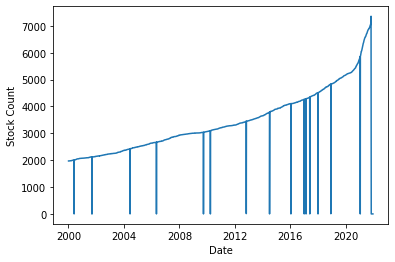

In [14]:
import matplotlib.pyplot as plt

plt.xlabel("Date")
plt.ylabel("Stock Count")
plt.plot(test.index,test['Stock Splits'])

In [15]:
from datetime import datetime, timedelta
import numpy as np


dates=pd.to_datetime(df_total["Date_NI"]).unique()
dates.sort()
df_list=[]

C=0

for ticker in tickers:
    if len(df_read[ticker])>0:
        temp = pd.DataFrame(dates, columns =['Dates'])
        temp= pd.merge(temp,df_read[ticker],how="left",left_on="Dates",right_on="Date_NI",suffixes=("_x", "_y"))

        temp['ind'] = temp['Ticker'].apply(lambda x: 0 if str(x)=="nan" else 1)
        temp['ind']=temp['ind'].cumsum()
        temp=temp[temp['ind']>0]
        temp=temp.ffill(axis = 0)

        temp["price 30 days later"]=temp["Close"].shift(-21)
        temp["price 30 days before"]=temp["Close"].shift(21)

        temp["prev 30 return"]=(temp["Close"]-temp["price 30 days before"])/temp["price 30 days before"]
        temp["next 30 return"]=(temp["price 30 days later"]-temp["Close"])/temp["Close"]
        df_list.append(temp)
        C=C+1
        print(C)
df_list[0]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702


5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344


6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990


,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_NI,Ticker,ind,price 30 days later,price 30 days before,prev 30 return,next 30 return
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,0.0,0.0,1950-01-03,SPX,1,17.049999,NaN,NaN,0.023409
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,0.0,0.0,1950-01-04,SPX,2,17.230000,NaN,NaN,0.022552
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,0.0,0.0,1950-01-05,SPX,3,17.290001,NaN,NaN,0.021264
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,0.0,0.0,1950-01-06,SPX,4,17.320000,NaN,NaN,0.020024
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,0.0,0.0,1950-01-09,SPX,5,17.230000,NaN,NaN,0.008782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18139,2021-12-13,4710.299805,4710.299805,4667.600098,4668.970215,3.322050e+09,0.0,0.0,2021-12-13,SPX,18105,NaN,4649.270020,0.004237,NaN
18140,2021-12-14,4642.990234,4660.470215,4606.520020,4634.089844,3.292740e+09,0.0,0.0,2021-12-14,SPX,18106,NaN,4682.850098,-0.010413,NaN
18141,2021-12-15,4636.459961,4712.600098,4611.220215,4709.850098,3.367580e+09,0.0,0.0,2021-12-15,SPX,18107,NaN,4682.799805,0.005777,NaN
18142,2021-12-16,4719.129883,4731.990234,4651.890137,4668.669922,3.592810e+09,0.0,0.0,2021-12-16,SPX,18108,NaN,4700.899902,-0.006856,NaN


In [16]:
df_total=pd.concat(df_list)

In [197]:
!pip3.7 install gurobipy

     |████████████████████████████████| 7.4 MB 3.3 MB/s            


In [17]:
from gurobipy import *
import random
import numpy as np

def get_universe(date,df_total,universe_size):

    print(date)
    filt=df_total[df_total["Dates"]==date]
    filt=filt[filt["ind"]>300]
    filt=filt[filt["Ticker"]!="SPX"]
    
    #filt=filt[filt["prev 30 return"]!="nan"]
    
    
    stock_returns=filt["prev 30 return"].values.tolist()
    stock_tickers=filt["Ticker"].values.tolist()
    
    sp500_return=df_total[(df_total["Ticker"]=="SPX") & (df_total["Dates"]==date)]["prev 30 return"].values.tolist()[0]
    print(sp500_return)
    Stock_Indicators={}

    m=Model()

    for i in range(len(stock_tickers)):
        Stock_Indicators[i]=m.addVar(vtype=GRB.BINARY, name="x")

    Total_Return=m.addVar(vtype=GRB.CONTINUOUS, name="x")
    Total_Return2=m.addVar(vtype=GRB.CONTINUOUS, name="x")

    m.addConstr(quicksum(Stock_Indicators[i] for i in range(len(stock_tickers)))>=universe_size)
    m.addConstr(Total_Return==quicksum(Stock_Indicators[i]*stock_returns[i] for i in range(len(stock_tickers)))-sp500_return*quicksum(Stock_Indicators[i] for i in range(len(stock_tickers))))
    m.addConstr(Total_Return2 == abs_(Total_Return))
    m.setObjective(Total_Return2)
    m.optimize()
    
    Universe=[]
    for i in range(len(stock_tickers)):
        if Stock_Indicators[i].X>0.9:
            Universe.append(stock_tickers[i])
    '''
    print("Error is:")
    test=filt[filt['Ticker'].isin(Universe)]
    print(sum(test["prev 30 return"].values.tolist())/len(test["prev 30 return"].values.tolist())-sp500_return)
    '''
    
    return Universe


def get_return(date, df_total, universe):
    vals={}
    sp500_return=df_total[(df_total["Ticker"]=="SPX") & (df_total["Dates"]==date)]["next 30 return"].values.tolist()[0]
    vals["SPX Return"]=sp500_return
    
    filt=df_total[df_total["Dates"]==date]
    filt=filt[filt['Ticker'].isin(universe)]
    vals["Portfolio Return"]= sum(filt["next 30 return"].values.tolist())/len(filt["next 30 return"].values.tolist())
    return vals

def get_prices(date,df_total,universe):
    filt=df_total[df_total["Dates"]<=date]
    filt=filt[filt['Ticker'].isin(universe)]
    return filt

def get_topo(df, start_year,st,end):
    
    price_df = df['Close']
    
    price_resampled_df = price_df.resample('24H').pad()[start_year:]
    
    embedding_dimension = 3
    embedding_time_delay = 2
    
    embedder = ts.SingleTakensEmbedding(
    parameters_type="fixed",
    dimension=embedding_dimension,
    time_delay=embedding_time_delay,
    n_jobs=-1,
    )
    
    price_values = price_resampled_df.values
    price_embedded = embedder.fit_transform(price_values)

    embedder_time_delay = embedder.time_delay_
    embedder_dimension = embedder.dimension_
    
    window_size = 31
    window_stride = 4
    
    sliding_window = ts.SlidingWindow(size=window_size, stride=window_stride)
    price_embedded_windows = sliding_window.fit_transform(price_embedded)
    
    window_num = 42
    point_cloud = price_embedded_windows[window_num][:, :3]
    #plot_point_cloud(point_cloud)
    
    window_size_price = window_size + embedder_dimension * embedder_time_delay - 2
    sliding_window_price = ts.SlidingWindow(size=window_size_price, stride=window_stride)
    window_indices = sliding_window_price.slice_windows(price_values)
    price_windows = sliding_window_price.fit_transform(price_values)
    
    abs_derivative_of_means = np.abs(np.mean(np.diff(price_windows, axis=0), axis=1))
    
    # define time index to combine with numpy arrays
    indices = [win[1] - 1 for win in window_indices[1:]]
    time_index_derivs = price_resampled_df.iloc[indices].index
    
    resampled_close_price_derivs = price_resampled_df.loc[time_index_derivs]
    
    # define the number of homology dimensions to track
    homology_dimensions = (0, 1)
    VR = hl.VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=-1)
    diagrams = VR.fit_transform(price_embedded_windows)
    
    #VR.plot(diagrams, sample=window_num)

    from joblib import Parallel, delayed, effective_n_jobs

    from sklearn.utils import gen_even_slices
    from sklearn.utils.validation import check_is_fitted

    from gtda.diagrams import PairwiseDistance
    from gtda.diagrams._metrics import _parallel_pairwise, landscapes, betti_curves
    from gtda.diagrams._utils import _subdiagrams
    from gtda.utils.validation import check_diagrams


    class HomologicalDerivative(PairwiseDistance):
        def __init__(self, **kw_args):
            super().__init__(**kw_args)

        def _derivatives_generic(self, X, s):

            return np.array(
                [
                    _parallel_pairwise(
                        np.expand_dims(X[t + 1], axis=0),
                        np.expand_dims(X[t], axis=0),
                        self.metric,
                        self.effective_metric_params_,
                        self.homology_dimensions_,
                        self.n_jobs,
                    )[0, 0]
                    for t in range(s.start, s.stop, 1)
                ]
            )

        def _derivatives(self, subdiagrams, kind, dim, params):
            n_samples, n_points = subdiagrams.shape[:2]
            if kind == "landscape":
                n_layers = min(params["n_layers"], n_points)
                features = landscapes(subdiagrams, params["samplings"][dim], n_layers)
            elif kind == "betti":
                features = betti_curves(subdiagrams, params["samplings"][dim])
            features = (features[1:] - features[:-1]).reshape(n_samples - 1, -1)
            features = np.linalg.norm(features, axis=1, ord=params["p"])

            return (params["step_sizes"][dim] ** (1 / params["p"])) * features

        def fit(self, X, y=None):
            super().fit(X, y)

            return self

        def transform(self, X, y=None):
            check_is_fitted(self, ["effective_metric_params_", "homology_dimensions_"])
            X = check_diagrams(X)

            if self.metric in ["landscape", "betti"]:
                Xt = Parallel(n_jobs=self.n_jobs)(
                    delayed(self._derivatives)(
                        _subdiagrams(X[s.start : s.stop + 1], [dim], remove_dim=True),
                        self.metric,
                        dim,
                        
                        self.effective_metric_params_,
                    )
                    for dim in self.homology_dimensions_
                    for s in gen_even_slices(len(X) - 1, effective_n_jobs(self.n_jobs))
                )
                Xt = np.concatenate(Xt)
                Xt = Xt.reshape(len(self.homology_dimensions_), len(X) - 1).T
            else:
                Xt = Parallel(n_jobs=self.n_jobs)(
                    delayed(self._derivatives_generic)(X, s)
                    for s in gen_even_slices(len(X) - 1, effective_n_jobs(self.n_jobs))
                )
                Xt = np.concatenate(Xt)

            if self.order is not None:
                Xt = np.linalg.norm(Xt, axis=1, ord=self.order)

            return Xt


    metric_params = {"p": 2, "n_layers": 10, "n_bins": 1000}

    landscape_hom_der = HomologicalDerivative(
            metric="landscape", metric_params=metric_params, order=2, n_jobs=-1
        )
    landscape_succ_dists = landscape_hom_der.fit_transform(diagrams)
        
    def get_probability(
        start_date,
        end_date,
        threshold,
        distances_1,
        distances_2,
        time_index_derivs,
        price_resampled_derivs,
    ):

        # calculate rolling mean, min, max of homological derivatives
        rolled_mean_1 = pd.Series(distances_1).rolling(20, min_periods=1).mean()
        rolled_min_1 = (
            pd.Series(distances_1)
            .rolling(len(distances_1), min_periods=1)
            .min()
        )
        rolled_max_1 = (
            pd.Series(distances_1)
            .rolling(len(distances_1), min_periods=1)
            .max()
        )

        # normalise the time series values to lies within [0, 1]
        probability_of_crash_1 = (rolled_mean_1 - rolled_min_1) / (
            rolled_max_1 - rolled_min_1
        )

        # calculate rolling mean, min, max of homological derivatives
        rolled_mean_2 = pd.Series(distances_2).rolling(20, min_periods=1).mean()
        rolled_min_2 = (
            pd.Series(distances_2)
            .rolling(len(distances_2), min_periods=1)
            .min()
        )
        rolled_max_2 = (
            pd.Series(distances_2)
            .rolling(len(distances_2), min_periods=1)
            .max()
        )

        # normalise the time series values to lies within [0, 1]
        probability_of_crash_2 = (rolled_mean_2 - rolled_min_2) / (
            rolled_max_2 - rolled_min_2
        )

        is_date_in_interval = (time_index_derivs > pd.Timestamp(start_date)) & (
            time_index_derivs < pd.Timestamp(end_date)
        )
        probability_of_crash_1_region = probability_of_crash_1[is_date_in_interval]
        probability_of_crash_2_region = probability_of_crash_2[is_date_in_interval]

        time_index_region = time_index_derivs[is_date_in_interval]

        return time_index_region,probability_of_crash_2_region

    time, probs=get_probability(
    start_date=st,
    end_date=end,
    threshold=0.3,
    distances_1=abs_derivative_of_means,
    distances_2=landscape_succ_dists,
    time_index_derivs=time_index_derivs,
    price_resampled_derivs=resampled_close_price_derivs,)
    
    df={'time': time,'probs': probs}
    df = pd.DataFrame(df)
    return df
    

In [18]:
dts=[]
output=[]
i=13860
while i<=len(dates)-22:
    dts.append(dates[i])
    i=i+21
i=0
for date in dts:
    print(i,len(dts))
    universe=get_universe(date,df_total,universe_size=1000)
    returns_dict=get_return(date, df_total, universe)
    output.append([date,universe,returns_dict])
    i=i+1

0 203
2004-12-31T00:00:00.000000000
0.017249090469248912
Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-12-27
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 2328 columns and 4653 nonzeros
Model fingerprint: 0xda028b8b
Model has 1 general constraint
Variable types: 2 continuous, 2326 integer (2326 binary)
Coefficient statistics:
  Matrix range     [2e-06, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 19 columns
Presolve time: 0.01s
Presolved: 2 rows, 2309 columns, 4617 nonzeros
Variable types: 1 continuous, 2308 integer (2305 binary)
Found heuristic solution: objective 27.4363261
Found heuristic solution: objective 26.2923427
Found heuristic solution:

H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000  0.00%     -    0s

Explored 1 nodes (11 simplex iterations) in 0.07 seconds (0.03 work units)
Thread count was 16 (of 16 available processors)

Solution count 2: 0 1.42215e-05 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
5 203
2005-06-02T00:00:00.000000000
0.03713495309496489
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 2392 columns and 4781 nonzeros
Model fingerprint: 0x6396c0ec
Model has 1 general constraint
Variable types: 2 continuous, 2390 integer (2390 binary)
Coefficient statistics:
  Matrix range     [2e-05, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 26 colu

H    0     0                       0.0000001    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 4

Explored 1 nodes (15 simplex iterations) in 0.20 seconds (0.07 work units)
Thread count was 16 (of 16 available processors)

Solution count 10: 0 1.00414e-07 1.0909e-06 ... 1.07786

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
9 203
2005-09-30T00:00:00.000000000
0.006949024316733625
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 2440 columns and 4877 nonzeros
Model fingerprint: 0xd38d4058
Model has 1 general constraint
Variable types: 2 continuous, 2438 integer (2438 binary)
Coefficient statistics:
  Matrix range     [3e-05, 2e+00]
  Objective 

Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 2488 columns and 4973 nonzeros
Model fingerprint: 0x5384b3a2
Model has 1 general constraint
Variable types: 2 continuous, 2486 integer (2486 binary)
Coefficient statistics:
  Matrix range     [1e-04, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 18 columns
Presolve time: 0.01s
Presolved: 2 rows, 2470 columns, 4939 nonzeros
Variable types: 1 continuous, 2469 integer (2467 binary)
Found heuristic solution: objective 57.3277186
Found heuristic solution: objective 57.3277073
Found heuristic solution: objective 53.6863252
Found heuristic solution: objective 53.6862696

Root relaxation: objective 0.000000e+00, 17 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/No

Coefficient statistics:
  Matrix range     [3e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 23 columns
Presolve time: 0.01s
Presolved: 2 rows, 2504 columns, 5007 nonzeros
Variable types: 1 continuous, 2503 integer (2501 binary)
Found heuristic solution: objective 0.0007593
Found heuristic solution: objective 0.0003120
Found heuristic solution: objective 0.0000010

Root relaxation: objective 0.000000e+00, 19 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
     0     0    0.00000    0    1    0.00000    0.00000   100%     -    0s
     0     0    0.00000    0    1    0.00000    0.00000   100%     -    0


     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000  0.00%     -    0s

Explored 1 nodes (14 simplex iterations) in 0.03 seconds (0.01 work units)
Thread count was 16 (of 16 available processors)

Solution count 4: 0 1.06016e-06 5.20804e-05 0.000579947 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
22 203
2006-10-30T00:00:00.000000000
0.031500601784674676
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 2581 columns and 5159 nonzeros
Model fingerprint: 0x16a03c18
Model has 1 general constraint
Variable types: 2 continuous, 2579 integer (2579 binary)
Coefficient statistics:
  Matrix range     [5e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
 

H    0     0                       0.0347889    0.00000   100%     -    0s
H    0     0                       0.0001240    0.00000   100%     -    0s
H    0     0                       0.0000087    0.00000   100%     -    0s
H    0     0                       0.0000045    0.00000   100%     -    0s
H    0     0                       0.0000022    0.00000   100%     -    0s
     0     0    0.00000    0    1    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000005    0.00000      -     -    0s
     0     0    0.00000    0    4    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    4    0.00000    0.00000      -     -    0s
     0     2    0.00000    0    4    0.00000    0.00000      -     -    0s
H  181   324                       0.0000000    0.00000  0.00%   1.2    0s

Cutting planes:
  Cover: 4
  MIR: 2

Explored 323 nodes (384 simplex iterations) in 0.49 seconds (0.23 work units)
Thread count was 16 (of 16 available processors)

Solution 

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    1.24901    0.00000   100%     -    0s
H    0     0                       0.0120041    0.00000   100%     -    0s
H    0     0                       0.0011096    0.00000   100%     -    0s
H    0     0                       0.0000008    0.00000      -     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  Cover: 1
  MIR: 2

Explored 1 nodes (16 simplex iterations) in 0.11 seconds (0.05 work units)
Thread count was 16 (of 16 available processors)

Solution count 8: 0 8.3415e-07 0.00110962 ... 2.20236

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
30 203
2007-07-03T00:00:00.000000000
-0.009297195970834398
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a

Coefficient statistics:
  Matrix range     [4e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 28 columns
Presolve time: 0.01s
Presolved: 2 rows, 2674 columns, 5347 nonzeros
Variable types: 1 continuous, 2673 integer (2671 binary)
Found heuristic solution: objective 8.3841593
Found heuristic solution: objective 8.3841293
Found heuristic solution: objective 1.5639664
Found heuristic solution: objective 1.5629559

Root relaxation: objective 0.000000e+00, 9 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    1.56296    0.00000   100%     -    0s
H    0     0                       0.3471298    0.00000   100%     -    0s
H    0     0                       0.0003829    0.00000   100%     -    0s
H    0     0                

Explored 1 nodes (12 simplex iterations) in 0.14 seconds (0.05 work units)
Thread count was 16 (of 16 available processors)

Solution count 8: 0 3.69771e-06 0.0173134 ... 7.36517

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
39 203
2008-04-03T00:00:00.000000000
0.03207843119935934
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 2769 columns and 5535 nonzeros
Model fingerprint: 0xcc437bd4
Model has 1 general constraint
Variable types: 2 continuous, 2767 integer (2767 binary)
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 28 columns
Presolve time: 0.01s
Presolved: 2 rows, 2741 columns, 5481 nonzeros
Variable types: 1 continuous, 2740 integer (2735 binary)


Found heuristic solution: objective 34.0995957
Found heuristic solution: objective 34.0995475
Found heuristic solution: objective 34.0988795
Found heuristic solution: objective 34.0353101

Root relaxation: objective 0.000000e+00, 14 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   34.03531    0.00000   100%     -    0s
H    0     0                       0.0980167    0.00000   100%     -    0s
H    0     0                       0.0000236    0.00000   100%     -    0s
H    0     0                       0.0000084    0.00000   100%     -    0s
     0     0    0.00000    0    3    0.00001    0.00000   100%     -    0s
H    0     0                       0.0000010    0.00000      -     -    0s
H    0     0                       0.0000002    0.00000      -     -    0s
     0     0    0.00000    0    2    0.00000   

H    0     0                       0.0000112    0.00000   100%     -    0s
H    0     0                       0.0000024    0.00000   100%     -    0s
     0     0    0.00000    0    1    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000008    0.00000      -     -    0s
H    0     0                       0.0000003    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
     0     2    0.00000    0    1    0.00000    0.00000      -     -    0s
H  394   413                       0.0000000    0.00000  0.00%   1.1    0s

Cutting planes:
  MIR: 3

Explored 412 nodes (462 simplex iterations) in 0.45 seconds (0.24 work units)
Thread count was 16 (of 16 available processors)

Solution count 9: 0 2.61854e-07 8.05046e-07 ... 0.00117397

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, 

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   56.49974    0.00000   100%     -    0s
H    0     0                       0.3182532    0.00000   100%     -    0s
H    0     0                       0.0000009    0.00000      -     -    0s
     0     0    0.00000    0    2    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    2    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    2    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
     0     2    0.00000    0    1    0.00000    0.00000      -     -    0s
H  417   422                       0.0000000    0.00000  0.00%   1.0    0s

Cutting planes:
  MIR: 1
  StrongCG: 1

Explored 421 nodes (459 simplex iterations) in 0.52 seconds (0.26 work units)
Thread count was 16 (of 16 available processors)

Sol

H    0     0                       0.4385555    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000  0.00%     -    0s

Explored 1 nodes (10 simplex iterations) in 0.03 seconds (0.01 work units)
Thread count was 16 (of 16 available processors)

Solution count 7: 0 0.438555 16.8658 ... 18.1635

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
56 203
2009-09-01T00:00:00.000000000
-0.004577986728020605
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 2973 columns and 5943 nonzeros
Model fingerprint: 0xe7ef1d82
Model has 1 general constraint
Variable types: 2 continuous, 2971 integer (2971 binary)
Coefficient statistics:
  Matrix range     [3e-05, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds 

Found heuristic solution: objective 37.3122008
Found heuristic solution: objective 36.0693330
Found heuristic solution: objective 36.0512471

Root relaxation: objective 0.000000e+00, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   36.05125    0.00000   100%     -    0s
H    0     0                       0.0975675    0.00000   100%     -    0s
H    0     0                       0.0000066    0.00000   100%     -    0s
H    0     0                       0.0000002    0.00000      -     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 2
  StrongCG: 1

Explored 1 nodes (15 simplex iterations) in 0.17 seconds (0.06 work units)
Thread count was 16 (of 16 available processors)

Solution count 9: 0 2.3476e-07 6.63261e-06 ... 41.3496

Optimal solution found

  Matrix range     [2e-05, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 48 columns
Presolve time: 0.01s
Presolved: 2 rows, 2963 columns, 5925 nonzeros
Variable types: 1 continuous, 2962 integer (2957 binary)
Found heuristic solution: objective 46.9197079
Found heuristic solution: objective 44.9422985
Found heuristic solution: objective 44.9422232
Found heuristic solution: objective 44.9315843
Found heuristic solution: objective 44.8333470

Root relaxation: objective 0.000000e+00, 18 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   44.83335    0.00000   100%     -    0s
H    0     0                       0.0239053    0.00000   100%     -    0s
H    0     0                       0.0000405    0.00000   100%     -    0s


Found heuristic solution: objective 0.0017824
Found heuristic solution: objective 0.0015074
Found heuristic solution: objective 0.0000423

Root relaxation: objective 0.000000e+00, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    0.00004    0.00000   100%     -    0s
H    0     0                       0.0000378    0.00000   100%     -    0s
H    0     0                       0.0000070    0.00000   100%     -    0s
H    0     0                       0.0000001    0.00000      -     -    0s
     0     0    0.00000    0    3    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    3    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
     0     2    0.00000

Variable types: 2 continuous, 3046 integer (3046 binary)
Coefficient statistics:
  Matrix range     [7e-05, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 44 columns
Presolve time: 0.01s
Presolved: 2 rows, 3004 columns, 6007 nonzeros
Variable types: 1 continuous, 3003 integer (2997 binary)
Found heuristic solution: objective 1.5893048
Found heuristic solution: objective 0.0222255
Found heuristic solution: objective 0.0221247
Found heuristic solution: objective 0.0219882
Found heuristic solution: objective 0.0173336

Root relaxation: objective 0.000000e+00, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    0.01733    0.00000   100%     -    0s
H    0     0                       0.0000716    0.00000   100%     -    0s


Thread count was 16 (of 16 available processors)

Solution count 8: 0 3.01786e-07 1.15983e-06 ... 6.54485

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
76 203
2011-04-29T00:00:00.000000000
0.026613746801106432
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3085 columns and 6167 nonzeros
Model fingerprint: 0xfe9b9fbe
Model has 1 general constraint
Variable types: 2 continuous, 3083 integer (3083 binary)
Coefficient statistics:
  Matrix range     [4e-06, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 26 columns
Presolve time: 0.01s
Presolved: 2 rows, 3059 columns, 6117 nonzeros
Variable types: 1 continuous, 3058 integer (3054 binary)
Found heuristic solution: objective 3.6366597
Found heuristic solution: 


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    0.00004    0.00000   100%     -    0s
H    0     0                       0.0000061    0.00000   100%     -    0s
H    0     0                       0.0000011    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000011    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
     0     2    0.00000    0    2    0.00000    0.00000   100%     -    0s
H  436   514                       0.0000000    0.00000  0.00%   1.1    0s

Cutting planes:
  MIR: 1

Explored 517 nodes (593 simplex iterations) in 0.52 seconds (0.27 work units)
Thread count was 16 (of 16 available processors)

Solution count 8: 

Found heuristic solution: objective 0.0000258
Found heuristic solution: objective 0.0000223

Root relaxation: objective 0.000000e+00, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    0.00002    0.00000   100%     -    0s
H    0     0                       0.0000172    0.00000   100%     -    0s
     0     0    0.00000    0    3    0.00002    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0    3    0.00000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 2

Explored 1 nodes (14 simplex iterations) in 0.10 seconds (0.05 work units)
Thread count was 16 (of 16 available processors)

Solution count 6: 0 1.71681e-05 2.23262e-05 ... 0.000658007

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, b

Variable types: 1 continuous, 3167 integer (3153 binary)
Found heuristic solution: objective 6.5601331
Found heuristic solution: objective 5.5842739
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.01 work units)
Thread count was 16 (of 16 available processors)

Solution count 3: 0 5.58427 6.56013 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
89 203
2012-05-30T00:00:00.000000000
-0.06051182538385856
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3236 columns and 6469 nonzeros
Model fingerprint: 0xa4911607
Model has 1 general constraint
Variable types: 2 continuous, 3234 integer (3234 binary)
Coefficient statistics:
  Matrix range     [1e-06, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 57 columns
Presolve time: 0.01s
Presolved: 2 rows, 3219 columns, 6437 nonzeros
Variable types: 1 continuous, 3218 integer (3209 binary)
Found heuristic solution: objective 10.1794049
Found heuristic solution: objective 8.7127575
Found heuristic solution: objective 8.7127516
Found heuristic solution: objective 8.7104999
Found heuristic solution: objective 8.6602593

Root relaxation: objective 0.000000e+00, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    8.66026    0.00000   100%     -    0s
H    0     0                       0.0560831    0.00000   100%     -    0s
H    0     0                       0.0000485    0.00000   100%     -    0s
H    0     0                       0.0000029    0.00000   100%     -    0


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   19.28794    0.00000   100%     -    0s
H    0     0                       0.1347159    0.00000   100%     -    0s
H    0     0                       0.0000036    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000032    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 1

Explored 1 nodes (27 simplex iterations) in 0.27 seconds (0.11 work units)
Thread count was 16 (of 16 available processors)

Solution count 9: 0 3.24112e-06 3.55109e-06 ... 19.2898

Optimal solution found (tolerance 1.00e

     0     0    0.00000    0    3    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 4

Explored 1 nodes (13 simplex iterations) in 0.25 seconds (0.10 work units)
Thread count was 16 (of 16 available processors)

Solution count 9: 0 2.79652e-06 4.73141e-06 ... 14.4861

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
102 203
2013-07-01T00:00:00.000000000
-0.009676606565959693
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3361 columns and 6719 nonzeros
Model fingerprint: 0x78db58f4
Model has 1 general constraint
Variable types: 2 continuous, 3359 integer (3359 binary)
Coefficient statistics:
  Matrix range     [8e-06, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range     


Explored 1 nodes (12 simplex iterations) in 0.14 seconds (0.06 work units)
Thread count was 16 (of 16 available processors)

Solution count 9: 0 5.9444e-06 6.76608e-05 ... 21.87

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
106 203
2013-10-29T00:00:00.000000000
0.053759864243559
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3410 columns and 6817 nonzeros
Model fingerprint: 0x713efa7c
Model has 1 general constraint
Variable types: 2 continuous, 3408 integer (3408 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 56 columns
Presolve time: 0.01s
Presolved: 2 rows, 3354 columns, 6707 nonzeros
Variable types: 1 continuous, 3353 integer (3345 binary)
F


Solution count 9: 0 1.7264e-07 8.67354e-06 ... 41.5543

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
110 203
2014-03-03T00:00:00.000000000
0.028726077363974048
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3466 columns and 6929 nonzeros
Model fingerprint: 0x9f98d2bb
Model has 1 general constraint
Variable types: 2 continuous, 3464 integer (3464 binary)
Coefficient statistics:
  Matrix range     [4e-05, 2e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 48 columns
Presolve time: 0.01s
Presolved: 2 rows, 3418 columns, 6835 nonzeros
Variable types: 1 continuous, 3417 integer (3413 binary)
Found heuristic solution: objective 223.1334843
Found heuristic solution: objective 223.1334503
Found heuristic solution:

  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 50 columns
Presolve time: 0.01s
Presolved: 2 rows, 3481 columns, 6961 nonzeros
Variable types: 1 continuous, 3480 integer (3473 binary)
Found heuristic solution: objective 0.0000854
Found heuristic solution: objective 0.0000325
Found heuristic solution: objective 0.0000076

Root relaxation: objective 0.000000e+00, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    0.00001    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 2
  StrongCG: 1

Explored 1 nodes (7 simplex iterations) in 0.10 seconds (0.05 work units)
Thread count was 16 (of 16 available processors)

Solution count 4: 0 7.60898e-06 3.25145e-0


Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
121 203
2015-01-29T00:00:00.000000000
-0.0331584525238016
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3639 columns and 7275 nonzeros
Model fingerprint: 0x9de96045
Model has 1 general constraint
Variable types: 2 continuous, 3637 integer (3637 binary)
Coefficient statistics:
  Matrix range     [1e-05, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 49 columns
Presolve time: 0.01s
Presolved: 2 rows, 3590 columns, 7179 nonzeros
Variable types: 1 continuous, 3589 integer (3580 binary)
Found heuristic solution: objective 26.3414876
Found heuristic solution: objective 26.2596707
Found heuristic solution: objective 26.2596613
Found heuristic solution: objective 2

0.012572450182615843
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3709 columns and 7415 nonzeros
Model fingerprint: 0xe761b0cf
Model has 1 general constraint
Variable types: 2 continuous, 3707 integer (3707 binary)
Coefficient statistics:
  Matrix range     [1e-05, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 43 columns
Presolve time: 0.01s
Presolved: 2 rows, 3666 columns, 7331 nonzeros
Variable types: 1 continuous, 3665 integer (3655 binary)
Found heuristic solution: objective 0.0019491
Found heuristic solution: objective 0.0010036
Found heuristic solution: objective 0.0009845
Found heuristic solution: objective 0.0002710
Found heuristic solution: objective 0.0001639

Root relaxation: objective 0.000000e+00, 18 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    C

Found heuristic solution: objective 4157.4800873
Found heuristic solution: objective 4153.7100640
Found heuristic solution: objective 4153.7091271

Root relaxation: objective 0.000000e+00, 16 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2 4153.70913    0.00000   100%     -    0s
H    0     0                       0.0011548    0.00000   100%     -    0s
H    0     0                       0.0000411    0.00000   100%     -    0s
     0     0    0.00000    0    1    0.00004    0.00000   100%     -    0s
H    0     0                       0.0000071    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0    1    0.00000    0.00000  0.00%     -    0s

Cutting planes:
  Cover: 1
  MIR: 2

Explored 1 nodes (20 simplex iterations) in 0.25 s

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 52 columns
Presolve time: 0.01s
Presolved: 2 rows, 3851 columns, 7701 nonzeros
Variable types: 1 continuous, 3850 integer (3838 binary)
Found heuristic solution: objective 41.8636522
Found heuristic solution: objective 41.8481310
Found heuristic solution: objective 41.8481285
Found heuristic solution: objective 25.6451928
Found heuristic solution: objective 25.6445260

Root relaxation: objective 0.000000e+00, 21 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   25.64453    0.00000   100%     -    0s
H    0     0                       0.0001254    0.00000   100%     -    0s
H    0     0                       0.0000024    0.00000   100%     -    0s
     0     0    0.00000    0    3    0.00000    0.00000   100%     -


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    1.78117    0.00000   100%     -    0s
H    0     0                       0.0122252    0.00000   100%     -    0s
H    0     0                       0.0000020    0.00000   100%     -    0s
     0     0    0.00000    0    1    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 2

Explored 1 nodes (21 simplex iterations) in 0.30 seconds (0.14 work units)
Thread count was 16 (of 16 available processors)

Solution count 7: 0 1.9738e-06 0.0122252 ... 13.3579

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
139 203
2016-07-28T00:00:00.000000000
0.06579772751812703
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical co

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   94.56026    0.00000   100%     -    0s
H    0     0                       0.0120123    0.00000   100%     -    0s
H    0     0                       0.0000434    0.00000   100%     -    0s
H    0     0                       0.0000132    0.00000   100%     -    0s
H    0     0                       0.0000018    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000015    0.00000   100%     -    0s
     0     2    0.00000    0    2    0.00000    0.00000   100%     -    0s
H   31    40                       0.0000000    0.00000  0.00%   1.0    0s

Explored 39 nodes (59 simplex iterations) in 0.47 seconds (0.25 work units)
Thread count was 16 (of 16 available processors)

Solution count 10: 0 1.53109e-06 1.80691e-06 ... 99.8242

Optimal solution found (tolerance 1.00e-04)
Best objective 0.0

-0.0108771866499942
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 4106 columns and 8209 nonzeros
Model fingerprint: 0xa4aec459
Model has 1 general constraint
Variable types: 2 continuous, 4104 integer (4104 binary)
Coefficient statistics:
  Matrix range     [8e-05, 7e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 67 columns
Presolve time: 0.01s
Presolved: 2 rows, 4039 columns, 8077 nonzeros
Variable types: 1 continuous, 4038 integer (4022 binary)
Found heuristic solution: objective 2.9597957
Found heuristic solution: objective 2.9460240
Found heuristic solution: objective 2.9460142
Found heuristic solution: objective 0.0012431
Found heuristic solution: objective 0.0004541

Root relaxation: objective 0.000000e+00, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Cur

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   10.28662    0.00000   100%     -    0s
H    0     0                       0.0438490    0.00000   100%     -    0s
H    0     0                       0.0000435    0.00000   100%     -    0s
H    0     0                       0.0000004    0.00000      -     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 3

Explored 1 nodes (16 simplex iterations) in 0.17 seconds (0.07 work units)
Thread count was 16 (of 16 available processors)

Solution count 9: 0 4.44672e-07 4.35014e-05 ... 17.8617

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
152 203
2017-08-23T00:00:00.000000000
-0.013358138376026629
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model w

  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 58 columns
Presolve time: 0.01s
Presolved: 2 rows, 4165 columns, 8329 nonzeros
Variable types: 1 continuous, 4164 integer (4151 binary)
Found heuristic solution: objective 0.0026276
Found heuristic solution: objective 0.0013946
Found heuristic solution: objective 0.0013776
Found heuristic solution: objective 0.0010404

Root relaxation: objective 0.000000e+00, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2    0.00104    0.00000   100%     -    0s
H    0     0                       0.0007042    0.00000   100%     -    0s
H    0     0                       0.0000022    0.00000   100%     -    0s
H    0     0                       0.0000019    0.00000   100%     -    0s
     0     0    0.00000    0    3    0.00000    0.00000   100%     -    0s
H   

Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.01 work units)
Thread count was 16 (of 16 available processors)

Solution count 3: 0 0.000238781 0.000313753 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
161 203
2018-05-23T00:00:00.000000000
0.037474940131541026
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 4297 columns and 8591 nonzeros
Model fingerprint: 0xa743bc76
Model has 1 general constraint
Variable types: 2 continuous, 4295 integer (4295 binary)
Coefficient statistics:
  Matrix range     [2e-06, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 53 columns
Presolve time: 0.01s
Presolved: 2 rows, 4244 columns, 8487 nonzeros
Variable types: 1 

Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
166 203
2018-10-22T00:00:00.000000000
-0.059320689257468875
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 4403 columns and 8803 nonzeros
Model fingerprint: 0x0203917f
Model has 1 general constraint
Variable types: 2 continuous, 4401 integer (4401 binary)
Coefficient statistics:
  Matrix range     [3e-05, 6e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 45 columns
Presolve time: 0.01s
Presolved: 2 rows, 4358 columns, 8715 nonzeros
Variable types: 1 continuous, 4357 integer (4345 binary)
Found heuristic solution: objective 0.0009350
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.01 work units)
Thread count was 16 (of 16 available processors)

Solu

H    0     0                       0.0000368    0.00000   100%     -    0s
H    0     0                       0.0000005    0.00000      -     -    0s
     0     0    0.00000    0    2    0.00000    0.00000      -     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 2

Explored 1 nodes (21 simplex iterations) in 0.31 seconds (0.15 work units)
Thread count was 16 (of 16 available processors)

Solution count 9: 0 5.37148e-07 3.67777e-05 ... 26.8452

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
171 203
2019-03-25T00:00:00.000000000
0.0020375431776966345
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 4518 columns and 9033 nonzeros
Model fingerprint: 0x4a437cb8
Model has 1 general constraint
Variable types: 2 continuous, 4516 integer (4516 

H   53    56                       0.0000000    0.00000  0.00%   1.2    0s

Cutting planes:
  MIR: 3

Explored 55 nodes (83 simplex iterations) in 0.39 seconds (0.27 work units)
Thread count was 16 (of 16 available processors)

Solution count 6: 0 2.05202e-08 1.7774e-06 ... 0.00200745

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
176 203
2019-08-22T00:00:00.000000000
-0.031994762663163465
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 4661 columns and 9319 nonzeros
Model fingerprint: 0xc7436a8a
Model has 1 general constraint
Variable types: 2 continuous, 4659 integer (4659 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 50 columns
Presolve time: 

Presolve removed 0 rows and 49 columns
Presolve time: 0.01s
Presolved: 2 rows, 4766 columns, 9531 nonzeros
Variable types: 1 continuous, 4765 integer (4746 binary)
Found heuristic solution: objective 12.5416884
Found heuristic solution: objective 12.4538520
Found heuristic solution: objective 12.4538330
Found heuristic solution: objective 12.4490663
Found heuristic solution: objective 12.3184072

Root relaxation: objective 0.000000e+00, 27 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   12.31841    0.00000   100%     -    0s
H    0     0                       0.0007675    0.00000   100%     -    0s
H    0     0                       0.0000023    0.00000   100%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000   100%     -    0s
H    0     0                       0.0000008    0.00000      

Coefficient statistics:
  Matrix range     [1e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 1e+03]
Presolve removed 0 rows and 61 columns
Presolve time: 0.01s
Presolved: 2 rows, 4834 columns, 9667 nonzeros
Variable types: 1 continuous, 4833 integer (4810 binary)
Found heuristic solution: objective 81.7072081
Found heuristic solution: objective 80.6139792
Found heuristic solution: objective 80.6139436
Found heuristic solution: objective 61.4824296
Found heuristic solution: objective 61.4824041

Root relaxation: objective 0.000000e+00, 24 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2   61.48240    0.00000   100%     -    0s
H    0     0                       0.0729093    0.00000   100%     -    0s
     0     0    0.00000    0    3    0.07291    0.0


     0     0    0.00000    0    2    0.00032    0.00000   100%     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s
     0     0    0.00000    0    2    0.00000    0.00000  0.00%     -    0s

Explored 1 nodes (13 simplex iterations) in 0.06 seconds (0.02 work units)
Thread count was 16 (of 16 available processors)

Solution count 6: 0 0.000320646 0.00165255 ... 0.00181618

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
190 203
2020-10-21T00:00:00.000000000
0.03618985204971071
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 5057 columns and 10111 nonzeros
Model fingerprint: 0xcbc0df14
Model has 1 general constraint
Variable types: 2 continuous, 5055 integer (5055 binary)
Coefficient statistics:
  Matrix range     [2e-05, 9e+00]
  Objective range  [1e+00, 1e+00]

H    0     0                       0.0000109    0.00000   100%     -    0s
     0     0    0.00000    0    1    0.00001    0.00000   100%     -    0s
H    0     0                       0.0000050    0.00000   100%     -    0s
     0     0    0.00000    0    3    0.00001    0.00000   100%     -    0s
H    0     0                       0.0000023    0.00000   100%     -    0s
H    0     0                       0.0000007    0.00000      -     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 1

Explored 1 nodes (26 simplex iterations) in 0.33 seconds (0.15 work units)
Thread count was 16 (of 16 available processors)

Solution count 10: 0 7.10372e-07 2.26953e-06 ... 120.574

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
194 203
2021-02-22T00:00:00.000000000
0.006080847538441311
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical

     0     0    0.00000    0    2    0.00006    0.00000   100%     -    0s
H    0     0                       0.0000005    0.00000      -     -    0s
     0     0    0.00000    0    1    0.00000    0.00000      -     -    0s
H    0     0                       0.0000004    0.00000      -     -    0s
H    0     0                       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  MIR: 2

Explored 1 nodes (30 simplex iterations) in 0.39 seconds (0.20 work units)
Thread count was 16 (of 16 available processors)

Solution count 10: 0 3.86561e-07 5.47024e-07 ... 15.0569

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
198 203
2021-06-22T00:00:00.000000000
0.02179574891957081
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 5247 columns and 10491 nonzeros
Model fingerprint: 0x8454f055
Model

Thread count was 16 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


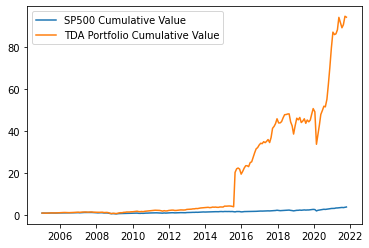

In [55]:
#Check Returns are working

import matplotlib.pyplot as plt

dates=[]
port_returns=[]
sp_returns=[]
sp=[]
rets=[]

port_returns_cur=1
sp_returns_cur=1

for i in range(len(output)):
    dates.append(output[i][0])
    port_returns_cur=port_returns_cur*(1+output[i][2]["Portfolio Return"])
    port_returns.append(port_returns_cur)
    
    sp_returns_cur=sp_returns_cur*(1+output[i][2]["SPX Return"])
    sp_returns.append(sp_returns_cur)
    sp.append(output[i][2]["SPX Return"]*100)
    
    rets.append(output[i][2]["Portfolio Return"]*100)
    
plt.plot(dates,sp_returns,label="SP500 Cumulative Value")
plt.plot(dates,port_returns,label="TDA Portfolio Cumulative Value")
plt.legend()

Text(4.766856353428667, 45.36, 'Mean: 3.67 %')

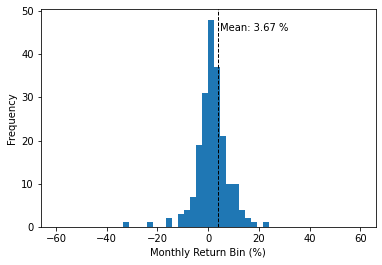

In [53]:
rets=np.array(rets)

plt.hist(rets,bins=50,range=(-60,60))
plt.axvline(rets.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Monthly Return Bin (%)")
plt.ylabel("Frequency")
min_ylim, max_ylim = plt.ylim()
plt.text(rets.mean()*1.3, max_ylim*0.9, 'Mean: {:.2f} %'.format(rets.mean()))

Text(4.347619484635223, 52.92, 'Mean: 0.79 %')

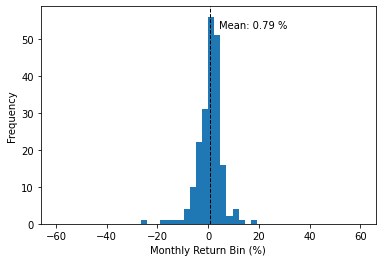

In [54]:
sp=np.array(sp)

plt.hist(sp,bins=50,range=(-60,60))
plt.axvline(sp.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Monthly Return Bin (%)")
plt.ylabel("Frequency")
min_ylim, max_ylim = plt.ylim()
plt.text(sp.mean()*5.5, max_ylim*0.9, 'Mean: {:.2f} %'.format(sp.mean()))

In [ ]:
rets=np.array(rets)

plt.hist(rets,bins=100,range=(-100,100))
plt.axvline(rets.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Monthly Return Bin (%)")
plt.ylabel("Frequency")
min_ylim, max_ylim = plt.ylim()
plt.text(rets.mean()*1.3, max_ylim*0.9, 'Mean: {:.2f}'.format(rets.mean()))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


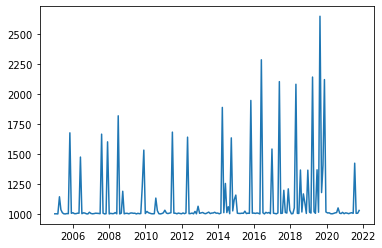

In [17]:
#Universe Table

table=np.array(output)
table=table[:,0:2]

df_universe= pd.DataFrame(table, columns = ['Date', 'Universe'])
df_universe["Num"]=df_universe["Universe"].apply(lambda x:len(x))
#df_universe["Num"].plot()

plt.plot(dates,df_universe["Num"])

In [274]:
get_prices(dts[0],df_total,df_universe["Universe"].values.tolist()[0])

,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_NI,Ticker,ind,price 30 days later,price 30 days before,prev 30 return,next 30 return
12569,1999-11-18,28.026168,30.797990,24.638391,27.102230,62546380.0,0.0,0.0,1999-11-18,A,1,28.873114,NaN,NaN,0.065341
12570,1999-11-19,26.447772,26.486271,24.522899,24.869377,15234146.0,0.0,0.0,1999-11-19,A,2,28.719124,NaN,NaN,0.154799
12571,1999-11-22,25.446837,27.102230,24.676888,27.102230,6577870.0,0.0,0.0,1999-11-22,A,3,29.296583,NaN,NaN,0.080966
12572,1999-11-23,26.178293,26.871249,24.638393,24.638393,5975611.0,0.0,0.0,1999-11-23,A,4,30.643995,NaN,NaN,0.243750
12573,1999-11-24,24.715386,25.831814,24.638390,25.292849,4843231.0,0.0,0.0,1999-11-24,A,5,32.530376,NaN,NaN,0.286149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13856,2004-12-27,4.690000,4.970000,4.690000,4.880000,544800.0,0.0,0.0,2004-12-27,ZIXI,3815,3.850000,4.45,0.096629,-0.211066
13857,2004-12-28,4.940000,5.380000,4.920000,5.190000,1074200.0,0.0,0.0,2004-12-28,ZIXI,3816,3.700000,4.40,0.179545,-0.287091
13858,2004-12-29,5.150000,5.250000,5.100000,5.110000,508100.0,0.0,0.0,2004-12-29,ZIXI,3817,3.660000,4.70,0.087234,-0.283757
13859,2004-12-30,5.120000,5.250000,5.010000,5.050000,445500.0,0.0,0.0,2004-12-30,ZIXI,3818,3.730000,4.58,0.102620,-0.261386
